In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score


# Data Visualization


In [2]:
dataSet = pd.read_csv('cleaned_all_phones.csv')
dataSet.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   phone_name         1512 non-null   object 
 1   brand              1512 non-null   object 
 2   os                 1512 non-null   object 
 3   inches             1512 non-null   float64
 4   resolution         1512 non-null   object 
 5   battery            1512 non-null   int64  
 6   battery_type       1512 non-null   object 
 7   ram(GB)            1512 non-null   int64  
 8   announcement_date  1512 non-null   object 
 9   weight(g)          1512 non-null   float64
 10  storage(GB)        1512 non-null   int64  
 11  video_720p         1512 non-null   bool   
 12  video_1080p        1512 non-null   bool   
 13  video_4K           1512 non-null   bool   
 14  video_8K           1512 non-null   bool   
 15  video_30fps        1512 non-null   bool   
 16  video_60fps        1512 

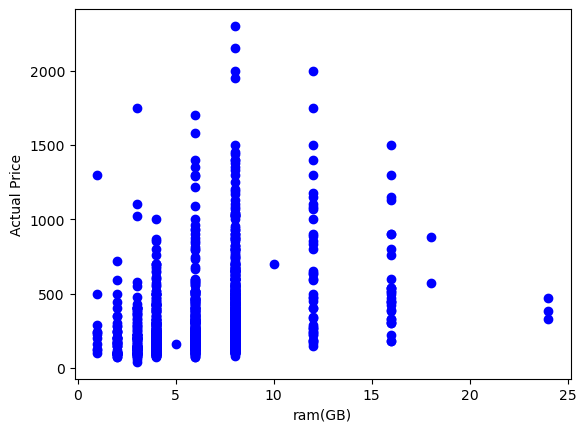

In [3]:
dataSet.info()
#This data set has only only 3 integer data type attributes
plt.scatter(dataSet[['ram(GB)']], dataSet[['price(USD)']], color ='blue', label = "Actual")
plt.xlabel('ram(GB)')
plt.ylabel('Actual Price')
plt.show()

# Model Creation

In [4]:
#dropping all non numeric columns for simplicity 
dataSet_numeric = dataSet.select_dtypes(include = ['float64', 'int64', 'bool'])
#features
X = dataSet_numeric.drop('price(USD)', axis = 1)
#target
y = dataSet_numeric['price(USD)']

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Linear Regression

In [5]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
#make the predictions
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 55804.65985376614
R-squared: 0.20699718127109612


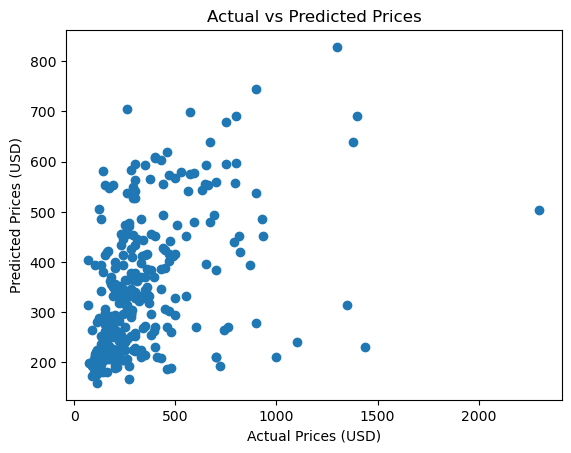

In [6]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices (USD)')
plt.ylabel('Predicted Prices (USD)')
plt.title('Actual vs Predicted Prices')
plt.show()


This data set has very poor performance in with linear regression because there is no linear pattern. A more complex model is required to achieve higher accuracy. 

# Logistical Regression

In [7]:
# Define price categories (0-3)
dataSet_numeric['price_category'] = pd.cut(dataSet_numeric['price(USD)'], bins=[-float('inf'), 0, 100, 500, float('inf')], labels=[0, 1, 2, 3])

X = dataSet_numeric.drop(['price(USD)','price_category'], axis=1)
y = dataSet_numeric['price_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy: 0.7920792079207921
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.82      0.95      0.88       240
           3       0.52      0.28      0.36        47

    accuracy                           0.79       303
   macro avg       0.45      0.41      0.41       303
weighted avg       0.73      0.79      0.75       303



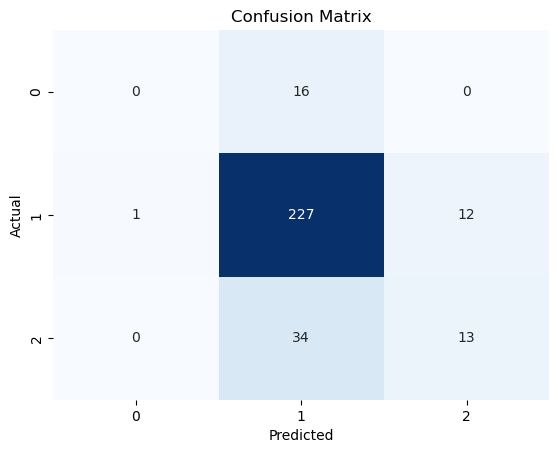

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

pred = log_reg.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, pred)

# Evaluate the model
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, pred))


sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Logistical regression models require a binary target variable which Price(USD) is not, it is continous.  
Therefore I created a new column called price_category that classifies the prices ranges from 0 to 100 , 100 to 300 , 300 to 500 and 500 to infinity. 
